# Introduction

I am going to handle the missing data of the data set which I scraped from kolesa.kz earlier.
After that, I will make a preprocessing for my dataset with NaN values replaced with mean and mode.

Importing libraries:

In [1]:
import numpy as np # used for handling numbers
import pandas as pd

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import MinMaxScaler

from jupyterthemes import jtplot
jtplot.style('oceans16')

Importing the dataset:

In [2]:
df = pd.read_excel('car_sells.xlsx')
df.shape

(372, 14)

Operations for cleaning and shaping the data frame:

In [3]:
df[['Объем двигателя, л', 'Топливо']] = df['Объем двигателя, л'].str.split(' ', expand=True)

df['Топливо'] = df['Топливо'].str.replace('(', '')
df['Топливо'] = df['Топливо'].str.replace(')', '')

df

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Топливо
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6,NaN,механика,слева,белый,передний привод,Да,газ-бензин
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6,141 000 км,механика,слева,серебристый металлик,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4,100 375 км,автомат,слева,черный металлик,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7,55 000 км,механика,слева,NaN,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6,23 500 км,механика,слева,серебристый металлик,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5,139 000 км,автомат,слева,белый металлик,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5,49 500 км,механика,слева,белый металлик,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4,170 000 км,автомат,слева,серый металлик,передний привод,Нет,бензин
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6,NaN,механика,слева,NaN,передний привод,Да,бензин


In [4]:
df['Пробег'] = df['Пробег'].str.replace(' км', '')

df.replace('NaN', 'null')
df.replace('null', np.nan)

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Топливо
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6,NaN,механика,слева,белый,передний привод,Да,газ-бензин
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6,141 000,механика,слева,серебристый металлик,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4,100 375,автомат,слева,черный металлик,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7,55 000,механика,слева,NaN,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6,23 500,механика,слева,серебристый металлик,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5,139 000,автомат,слева,белый металлик,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5,49 500,механика,слева,белый металлик,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4,170 000,автомат,слева,серый металлик,передний привод,Нет,бензин
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6,NaN,механика,слева,NaN,передний привод,Да,бензин


Dealing with data types:

In [5]:
df['Объем двигателя, л'] = df['Объем двигателя, л'].astype('float')

df['Пробег'] = df['Пробег'].str.replace(' ', '')
df['Пробег'] = df['Пробег'].astype('float')


Encoding the categorical and string values:

In [6]:
from sklearn.preprocessing import OrdinalEncoder

df['Топливо'] = df['Топливо'].astype('category')
df['Fuel'] = df['Топливо'].cat.codes

df['Body'] = np.where(df['Кузов'].str.contains('седан'), 1, 0)

ord_enc = OrdinalEncoder()
df['brnd'] = ord_enc.fit_transform(df[['Brand']])
df

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Топливо,Fuel,Body,brnd
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6,NaN,механика,слева,белый,передний привод,Да,газ-бензин,2,0,25.0
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6,141000.0,механика,слева,серебристый металлик,передний привод,Да,бензин,0,1,4.0
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4,100375.0,автомат,слева,черный металлик,полный привод,Да,бензин,0,0,17.0
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7,55000.0,механика,слева,NaN,полный привод,Да,бензин,0,0,28.0
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6,23500.0,механика,слева,серебристый металлик,передний привод,Да,бензин,0,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5,139000.0,автомат,слева,белый металлик,передний привод,Да,бензин,0,1,23.0
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5,49500.0,механика,слева,белый металлик,передний привод,Да,бензин,0,1,19.0
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4,170000.0,автомат,слева,серый металлик,передний привод,Нет,бензин,0,1,7.0
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6,NaN,механика,слева,NaN,передний привод,Да,бензин,0,0,20.0


Looking at the dataset, checking datatypes, null values and etc...

In [7]:
df.describe()

,Year,Price,"Объем двигателя, л",Пробег,Fuel,Body,brnd
count,372.000000,3.720000e+02,372.000000,3.000000e+02,372.000000,372.000000,372.000000
mean,2015.446237,8.528214e+06,2.100177,8.680550e+04,0.266129,0.594086,15.938172
std,3.113281,7.258028e+06,0.895392,8.687116e+04,0.749938,0.491729,8.290152
min,2010.000000,6.800000e+05,0.800000,5.000000e+00,0.000000,0.000000,0.000000
25%,2013.000000,3.637500e+06,1.600000,2.856375e+04,0.000000,0.000000,7.000000
50%,2015.000000,6.900000e+06,1.700000,8.205000e+04,0.000000,1.000000,20.000000
75%,2018.000000,1.092500e+07,2.500000,1.252500e+05,0.000000,1.000000,23.000000
max,2021.000000,4.800000e+07,6.300000,1.174411e+06,3.000000,1.000000,28.000000


In [8]:
df.isnull().sum()

Brand                       0
Name                        0
Year                        0
Price                       0
Currency                    0
Город                       0
Кузов                       0
Объем двигателя, л          0
Пробег                     72
Коробка передач             0
Руль                        0
Цвет                       40
Привод                     54
Растаможен в Казахстане     0
Топливо                     0
Fuel                        0
Body                        0
brnd                        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Brand                    372 non-null    object  
 1   Name                     372 non-null    object  
 2   Year                     372 non-null    int64   
 3   Price                    372 non-null    int64   
 4   Currency                 372 non-null    object  
 5   Город                    372 non-null    object  
 6   Кузов                    372 non-null    object  
 7   Объем двигателя, л       372 non-null    float64 
 8   Пробег                   300 non-null    float64 
 9   Коробка передач          372 non-null    object  
 10  Руль                     372 non-null    object  
 11  Цвет                     332 non-null    object  
 12  Привод                   318 non-null    object  
 13  Растаможен в Казахстане  372 non-null    object  
 14  Топливо   

Importing and starting work with missing values, plotting bar, matrix, heatmap and dendrogram...:

<AxesSubplot:>

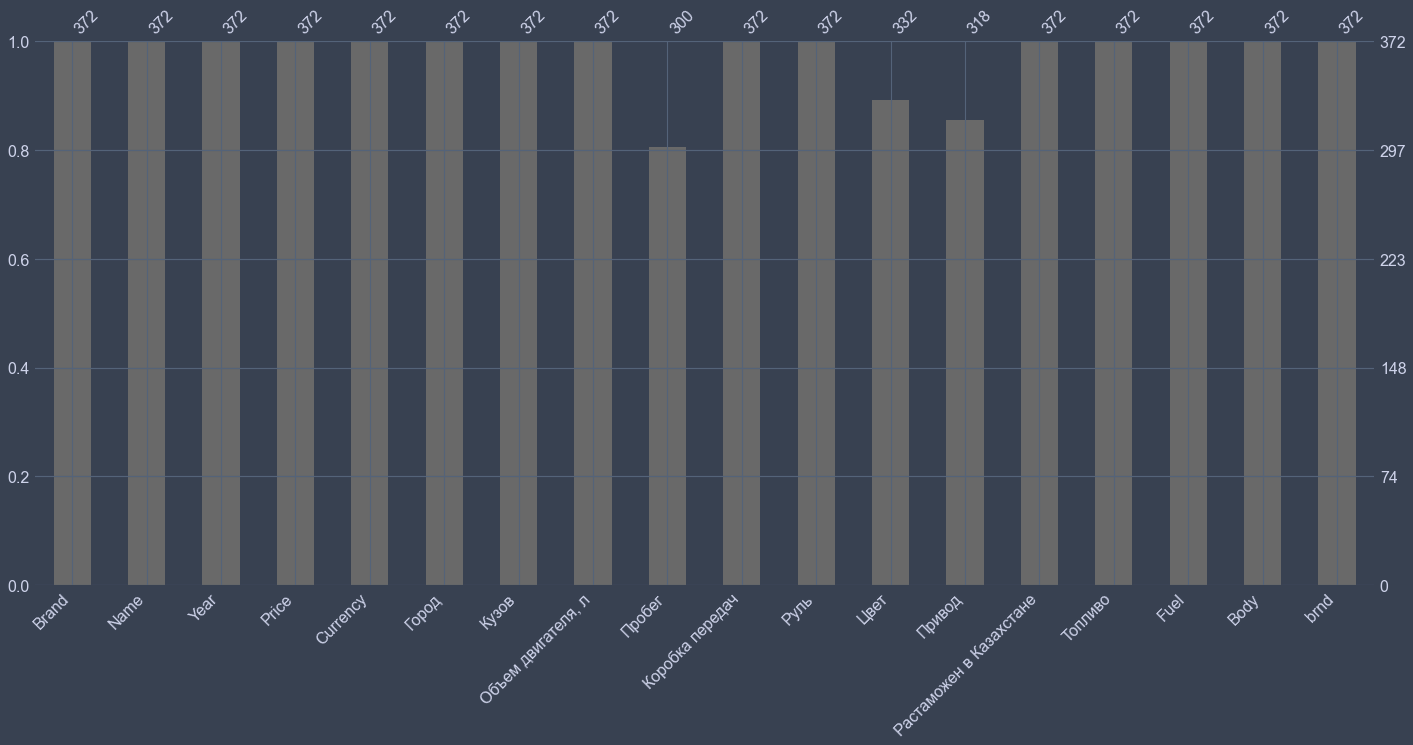

In [10]:
import missingno as msno

msno.bar(df)

<AxesSubplot:>

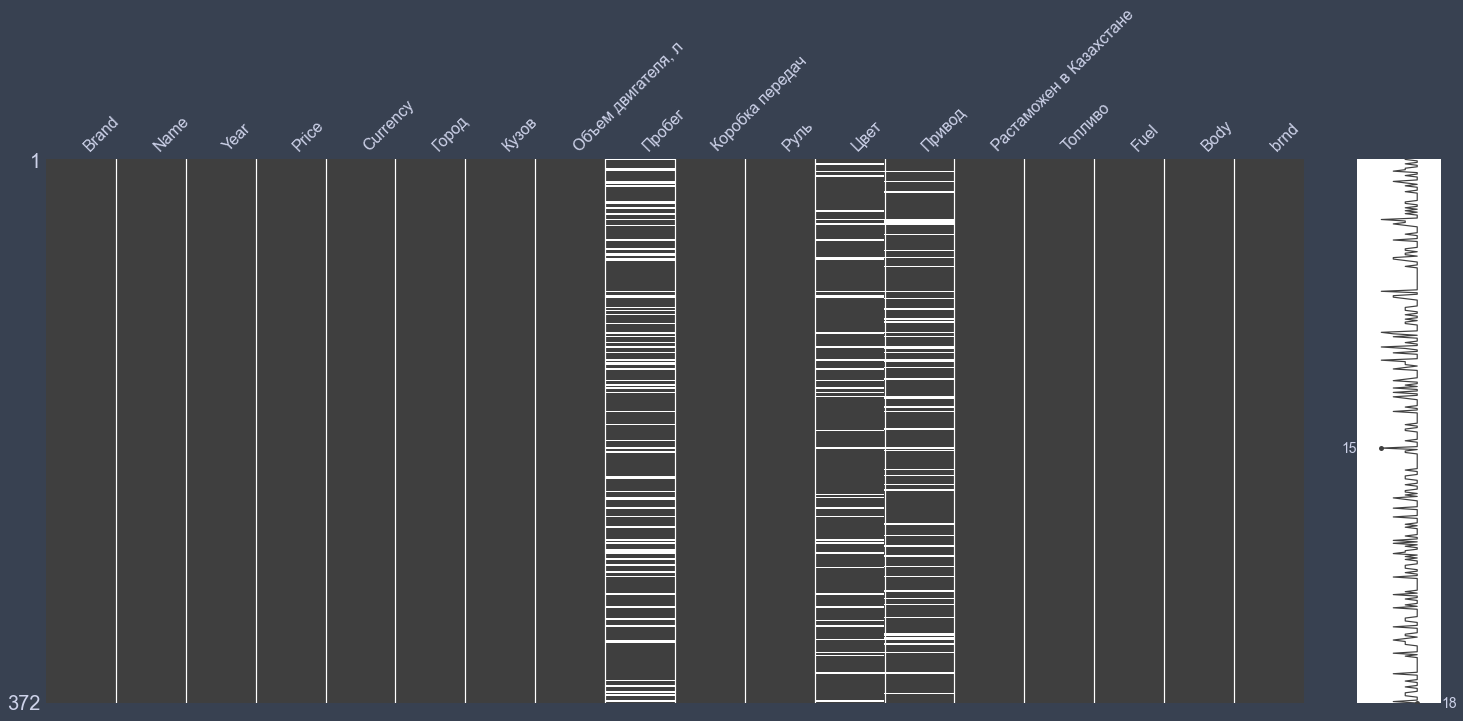

In [11]:
msno.matrix(df)

<AxesSubplot:>

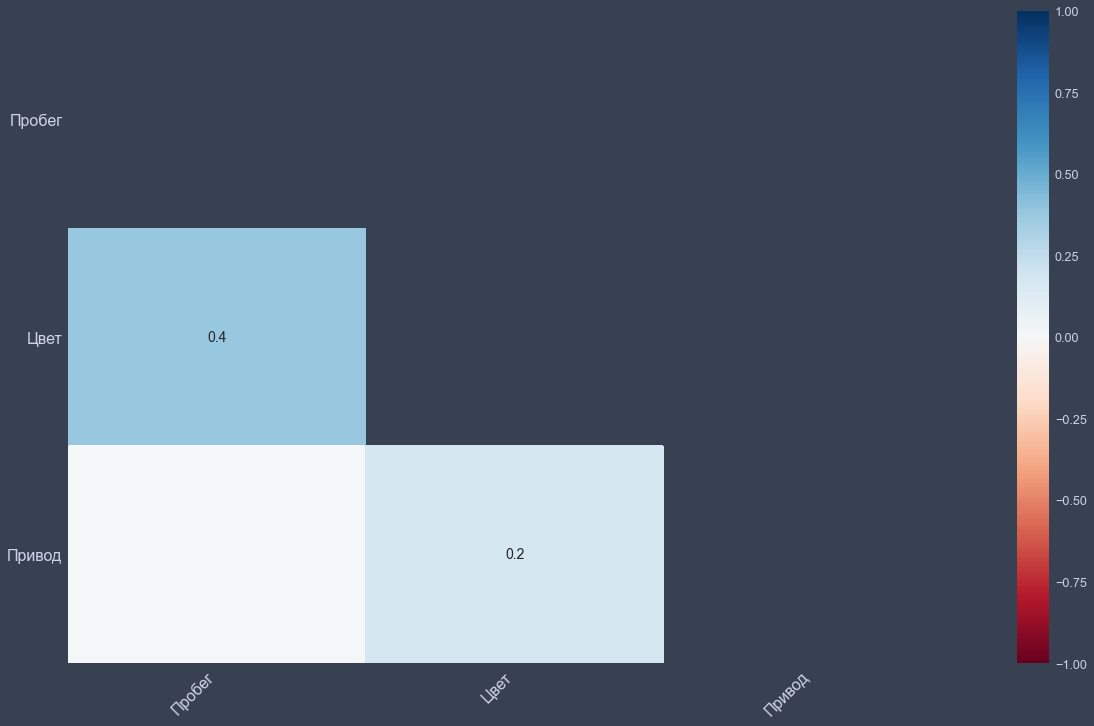

In [12]:
msno.heatmap(df)

<AxesSubplot:>

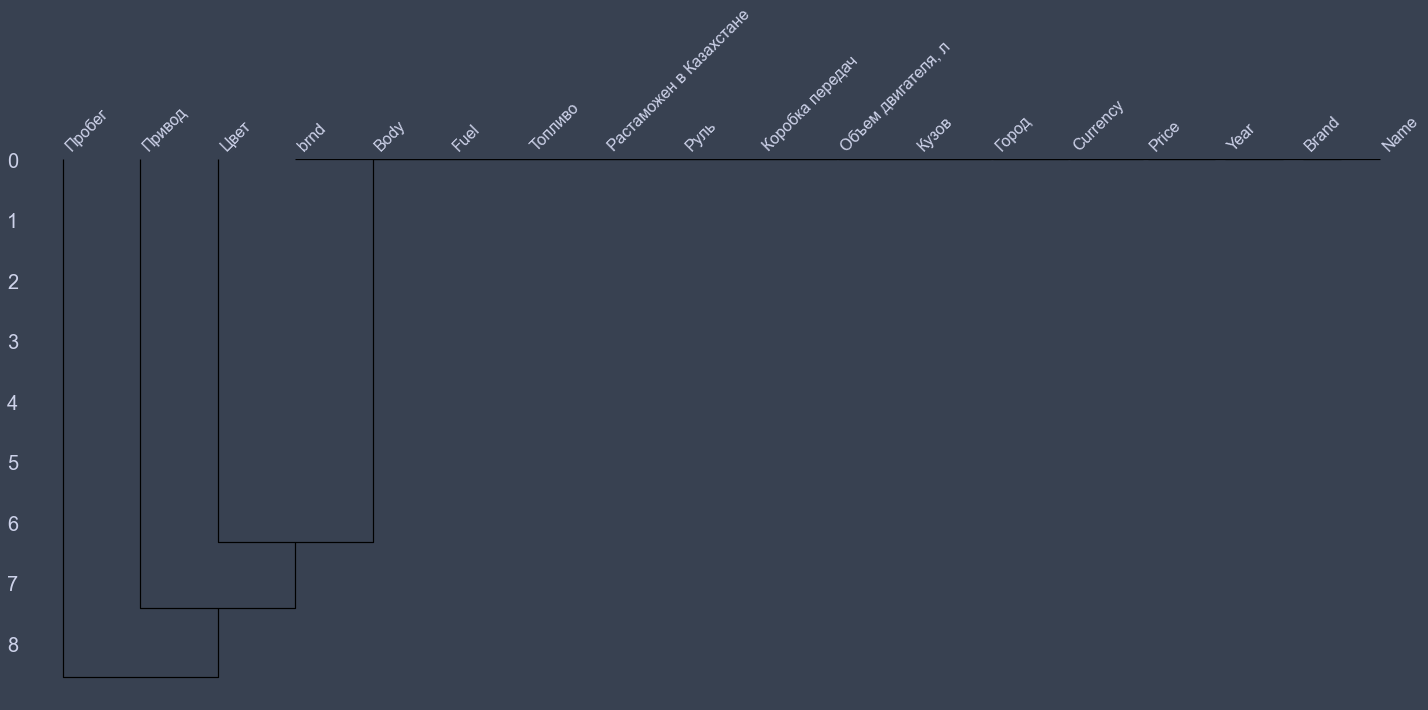

In [13]:
msno.dendrogram(df)

Imputing values by using SI at strategy mean for "Пробег" colunm:

In [14]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df_copy = df.copy()

In [15]:
df_copy['Пробег'] = mean_imputer.fit_transform(df_copy[['Пробег']]).ravel()

In [16]:
df_copy['Пробег'].isnull().sum()

0

Imputing with str. mode for "Привод" and "Цвет":

In [17]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_copy['Привод'] = mode_imputer.fit_transform(df_copy[['Привод']]).ravel()

df_copy['Привод'].isnull().sum()

0

In [18]:
df_copy['Цвет'] = mode_imputer.fit_transform(df_copy[['Цвет']]).ravel()

df_copy['Цвет'].isnull().sum()

0

In [19]:
df_copy

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Топливо,Fuel,Body,brnd
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6,86805.5,механика,слева,белый,передний привод,Да,газ-бензин,2,0,25.0
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6,141000.0,механика,слева,серебристый металлик,передний привод,Да,бензин,0,1,4.0
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4,100375.0,автомат,слева,черный металлик,полный привод,Да,бензин,0,0,17.0
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7,55000.0,механика,слева,белый,полный привод,Да,бензин,0,0,28.0
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6,23500.0,механика,слева,серебристый металлик,передний привод,Да,бензин,0,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5,139000.0,автомат,слева,белый металлик,передний привод,Да,бензин,0,1,23.0
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5,49500.0,механика,слева,белый металлик,передний привод,Да,бензин,0,1,19.0
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4,170000.0,автомат,слева,серый металлик,передний привод,Нет,бензин,0,1,7.0
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6,86805.5,механика,слева,белый,передний привод,Да,бензин,0,0,20.0


In [20]:
df_copy.isnull().sum()

Brand                      0
Name                       0
Year                       0
Price                      0
Currency                   0
Город                      0
Кузов                      0
Объем двигателя, л         0
Пробег                     0
Коробка передач            0
Руль                       0
Цвет                       0
Привод                     0
Растаможен в Казахстане    0
Топливо                    0
Fuel                       0
Body                       0
brnd                       0
dtype: int64

In [21]:
df_org  = df.copy()

In [22]:
df = df_copy.copy()

As It was not possible to encode the columns with null values I am going to do that after filling missing values:

In [23]:
from sklearn.preprocessing import LabelEncoder

df['Color'] = ord_enc.fit_transform(df[['Цвет']])

lb_enc = LabelEncoder()

df['Drive'] = lb_enc.fit_transform(df['Привод'])

In [24]:
df

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Топливо,Fuel,Body,brnd,Color,Drive
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6,86805.5,механика,слева,белый,передний привод,Да,газ-бензин,2,0,25.0,1.0,1
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6,141000.0,механика,слева,серебристый металлик,передний привод,Да,бензин,0,1,4.0,17.0,1
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4,100375.0,автомат,слева,черный металлик,полный привод,Да,бензин,0,0,17.0,23.0,2
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7,55000.0,механика,слева,белый,полный привод,Да,бензин,0,0,28.0,1.0,2
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6,23500.0,механика,слева,серебристый металлик,передний привод,Да,бензин,0,1,25.0,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5,139000.0,автомат,слева,белый металлик,передний привод,Да,бензин,0,1,23.0,2.0,1
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5,49500.0,механика,слева,белый металлик,передний привод,Да,бензин,0,1,19.0,2.0,1
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4,170000.0,автомат,слева,серый металлик,передний привод,Нет,бензин,0,1,7.0,19.0,1
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6,86805.5,механика,слева,белый,передний привод,Да,бензин,0,0,20.0,1.0,1


Deleting columns for convenience and which won't be used in future:

In [25]:
del df['Brand']
del df['Name']
del df['Currency']
del df['Город']
del df['Кузов']
del df['Коробка передач']
del df['Руль']
del df['Цвет']
del df['Привод']
del df['Растаможен в Казахстане']
del df['Топливо']

df

,Year,Price,"Объем двигателя, л",Пробег,Fuel,Body,brnd,Color,Drive
0,2013,3100000,1.6,86805.5,2,0,25.0,1.0,1
1,2012,2100000,1.6,141000.0,0,1,4.0,17.0,1
2,2013,6500000,2.4,100375.0,0,0,17.0,23.0,2
3,2017,4500000,2.7,55000.0,0,0,28.0,1.0,2
4,2018,3650000,1.6,23500.0,0,1,25.0,17.0,1
...,...,...,...,...,...,...,...,...,...
367,2017,13000000,2.5,139000.0,0,1,23.0,2.0,1
368,2017,4250000,1.5,49500.0,0,1,19.0,2.0,1
369,2011,2900000,1.4,170000.0,0,1,7.0,19.0,1
370,2020,9796000,1.6,86805.5,0,0,20.0,1.0,1


Taking linear regression of the initial dataset: 

In [26]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()

In [27]:
y = df.Price

x = df.drop('Price', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [28]:
reg.fit(x_train, y_train)

LinearRegression()

In [29]:
reg.score(x_test, y_test)

0.5413126266825725

Scaling the dafarame with Standardization:

In [30]:
sc = StandardScaler()
df1 = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

y2 = df1.Price

x2 = df1.drop('Price', axis = 1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2)

reg2 = linear_model.LinearRegression()

reg2.fit(x_train2, y_train2)

LinearRegression()

In [40]:
print(x2)

         Year  Объем двигателя, л    Пробег      Fuel      Body      brnd  \
0   -0.786800           -0.559365  0.000000  2.315132 -1.209784  1.094556   
1   -1.108438           -0.559365  0.695850 -0.355346  0.826594 -1.441982   
2   -0.786800            0.335301  0.174230 -0.355346 -1.209784  0.128256   
3    0.499748            0.670801 -0.408378 -0.355346 -1.209784  1.456918   
4    0.821385           -0.559365 -0.812834 -0.355346  0.826594  1.094556   
..        ...                 ...       ...       ...       ...       ...   
367  0.499748            0.447135  0.670170 -0.355346  0.826594  0.852981   
368  0.499748           -0.671198 -0.478997 -0.355346  0.826594  0.369831   
369 -1.430075           -0.783031  1.068206 -0.355346  0.826594 -1.079619   
370  1.464659           -0.559365  0.000000 -0.355346 -1.209784  0.490618   
371  1.464659            0.111635 -1.090431  3.650370 -1.209784 -0.838044   

        Color     Drive  
0   -0.988670 -0.289073  
1    0.756973 -0.289073

In [31]:
reg2.score(x_test2, y_test2)

0.7525721536007277

Scaling with Normalization:

In [32]:
scn = MinMaxScaler()
df2 = pd.DataFrame(scn.fit_transform(df), columns= df.columns)

y3 = df2.Price

x3 = df2.drop('Price', axis = 1)

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.2)

reg3 = linear_model.LinearRegression()

reg3.fit(x_train3, y_train3)

LinearRegression()

In [33]:
reg3.score(x_test3, y_test3)

0.5954197772893194

Drawing plots for the initial, after standardization and after normalization datasets:

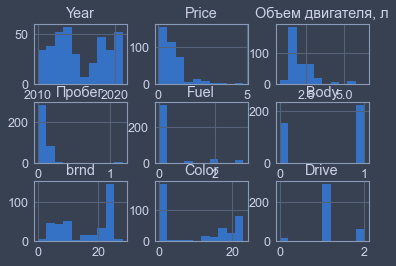

In [34]:
import matplotlib.pyplot as plt

df.hist()
plt.show()

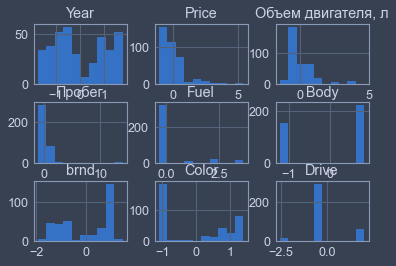

In [35]:
df1.hist()
plt.show()

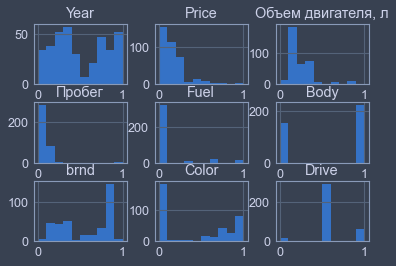

In [36]:
df2.hist()
plt.show()

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Year'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Year'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Year'>,
        <AxesSubplot:xlabel='Body', ylabel='Year'>,
        <AxesSubplot:xlabel='brnd', ylabel='Year'>,
        <AxesSubplot:xlabel='Color', ylabel='Year'>,
        <AxesSubplot:xlabel='Drive', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Price'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Price'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Price'>,
        <AxesSubplot:xlabel='Body', ylabel='Price'>,
        <AxesSubplot:xlabel='brnd', ylabel='Price'>,
        <AxesSubplot:xlabel='Color', ylabel='Price'>,
        <AxesSubplot:xlabel='Drive', ylabel='Price'>],
       [<AxesSu

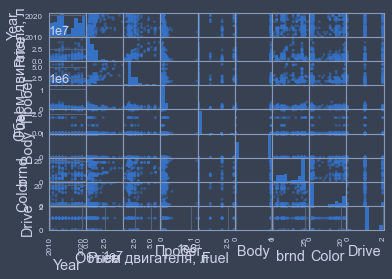

In [37]:
pd.plotting.scatter_matrix(df)

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Year'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Year'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Year'>,
        <AxesSubplot:xlabel='Body', ylabel='Year'>,
        <AxesSubplot:xlabel='brnd', ylabel='Year'>,
        <AxesSubplot:xlabel='Color', ylabel='Year'>,
        <AxesSubplot:xlabel='Drive', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Price'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Price'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Price'>,
        <AxesSubplot:xlabel='Body', ylabel='Price'>,
        <AxesSubplot:xlabel='brnd', ylabel='Price'>,
        <AxesSubplot:xlabel='Color', ylabel='Price'>,
        <AxesSubplot:xlabel='Drive', ylabel='Price'>],
       [<AxesSu

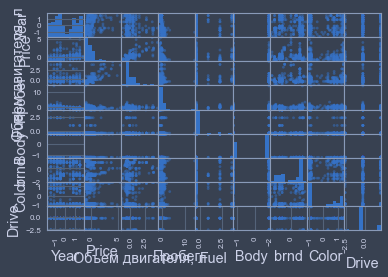

In [38]:
pd.plotting.scatter_matrix(df1)

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Year'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Year'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Year'>,
        <AxesSubplot:xlabel='Body', ylabel='Year'>,
        <AxesSubplot:xlabel='brnd', ylabel='Year'>,
        <AxesSubplot:xlabel='Color', ylabel='Year'>,
        <AxesSubplot:xlabel='Drive', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Объем двигателя, л', ylabel='Price'>,
        <AxesSubplot:xlabel='Пробег', ylabel='Price'>,
        <AxesSubplot:xlabel='Fuel', ylabel='Price'>,
        <AxesSubplot:xlabel='Body', ylabel='Price'>,
        <AxesSubplot:xlabel='brnd', ylabel='Price'>,
        <AxesSubplot:xlabel='Color', ylabel='Price'>,
        <AxesSubplot:xlabel='Drive', ylabel='Price'>],
       [<AxesSu

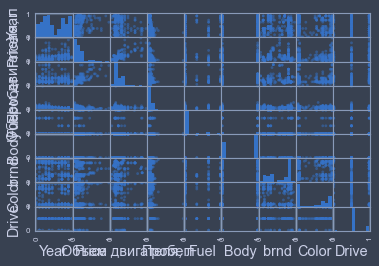

In [39]:
pd.plotting.scatter_matrix(df2)

## Conclusion

1. the initial = 0.54

2. with standartization = 0.75

3. with normalization = 0.59


It is evident that with normalization it has middle precision and the initial is the lowest, whereas standartization gave the most.

By the end, we got plots for initial and final data set, but the models look almost the same.

So, in this notebook we did some work on:

    * Cleaning and shaping dataset    
    * Handling missing values    
    * Linear regression at the beginning, after standardization and after normalization
    * Plots for the data frames for each step of preprocessing
    
I give myself 95-99, as I did every task rightly and explained clearly each step.